In [1]:
from PythonTsa.datadir import getdtapath
import pandas as pd
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
dtapath=getdtapath()
import os
dtapath = getdtapath()
arquivos = os.listdir(dtapath)
for arquivo in arquivos:
    print(arquivo)

AntidiabeticDrugSales.csv
areturns.csv
AustraliaEmployedTotalPersons.xlsx
AustraliaUnemployedTotalPersons.xlsx
BitcoinPrice17-6-23-18-6-22.xlsx
chaos.csv
DAX.csv
DAXlogret.csv
dlGDPukcaus1q1980.csv
EconGermany.dat
elec-temp.csv
ExchRate NZ per UK.txt
gdpquarterlychina1992.1-2017.4.csv
Global mean surface air temp changes 1880-1985.csv
GlobalTemperature.txt
h02July1991June2008.csv
IBM.csv
ibmlogret.csv
milk.xlsx
monthly returns of PG stock 1961 to 2016.csv
monthly returns of Procter n Gamble stock n 3 market indexes 1961 to 2016.csv
nao.csv
Noboyngirl.csv
realGdpConsInv.csv
RwalkwDrift0.3.csv
Southtemperature.txt
SP500dailyreturns.csv
us-q-rgdp.csv
USbill.csv
USEconomicChange.csv
USFemalesAged20+Job1948-81.csv
usFOI.csv
usGDPnotAdjust.csv
USmacronInRate.txt
USQgdpunemp.csv
WTI-Brent.csv
Yearly mean total sunspot number 1700 - 2017.csv


# 8.4

In [61]:
gdp = pd.read_csv(dtapath + "realGdpConsInv.csv")

In [62]:
data = pd.date_range('1959-03', periods=len(gdp), freq ='Q')
gdp.index = data

In [63]:
gdp = gdp.drop(columns=['Unnamed: 0'])

In [64]:
gdp

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722
...,...,...,...
2008-09-30,13324.600,9267.7,1990.693
2008-12-31,13141.920,9195.3,1857.661
2009-03-31,12925.410,9209.2,1558.494
2009-06-30,12901.504,9189.0,1456.678


<Axes: >

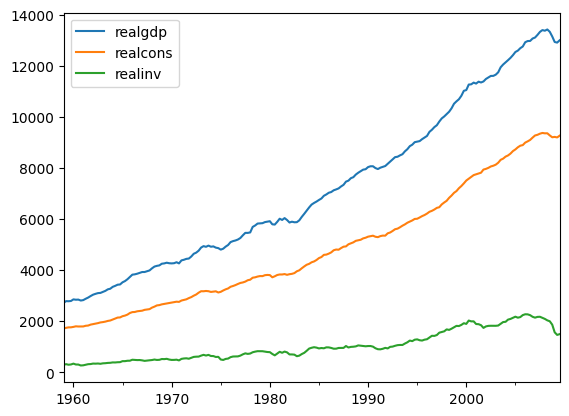

In [65]:
gdp.plot()

<Axes: >

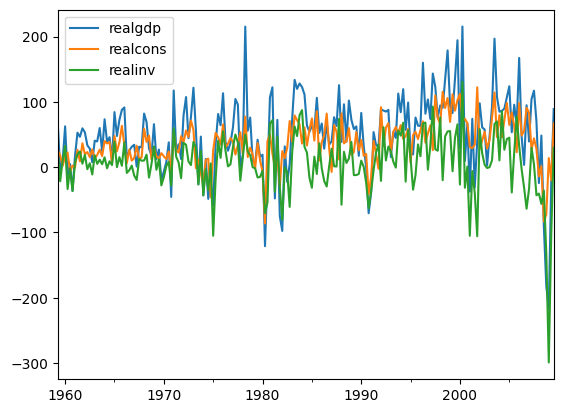

In [66]:
dgdp = gdp.diff().dropna()
dgdp.plot()

In [67]:
#realcon e realinv vão ser exogenas, vamos montar o sarimax.

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [69]:
from PythonTsa.plot_multi_ACF import multi_ACFfig

In [70]:
dgdp

,realgdp,realcons,realinv
1959-06-30,68.452,26.3,23.961
1959-09-30,-3.313,18.1,-21.633
1959-12-31,9.716,1.9,10.130
1960-03-31,62.495,16.8,32.366
1960-06-30,-13.309,22.4,-33.570
...,...,...,...
2008-09-30,-90.666,-83.3,-35.825
2008-12-31,-182.680,-72.4,-133.032
2009-03-31,-216.510,13.9,-299.167
2009-06-30,-23.906,-20.2,-101.816


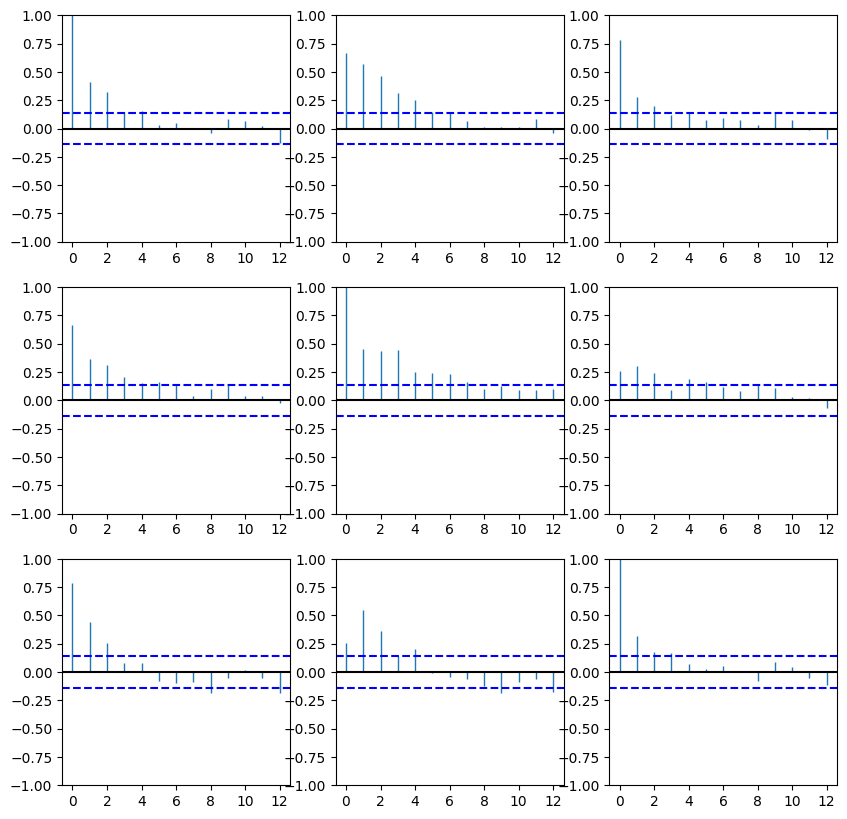

In [71]:
multi_ACFfig(dgdp, nlags=12)
plt.show()

In [72]:
x = dgdp[['realcons', 'realinv']]
y = dgdp['realgdp']
x = sm.add_constant(x)

In [169]:
sarimax_mod = SARIMAX(endog=y, exog=x, 
                      order=(4,0,0), seasonal_order=(0,0,0,0)).fit()
sarimax_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                realgdp   No. Observations:                  202
Model:               SARIMAX(4, 0, 0)   Log Likelihood                -912.404
Date:                Thu, 08 Aug 2024   AIC                           1840.809
Time:                        15:53:49   BIC                           1867.275
Sample:                    06-30-1959   HQIC                          1851.517
                         - 09-30-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9341      4.123      2.410      0.016       1.854      18.014
realcons       0.9604      0.060     15.988      0.000       0.843       1.078
realinv        0.9385      0.032     29.420      0.000       0.876       1.001
ar.L1         -0.0241      0.063     -0.381      0.703      -0.148       0.100
ar.L2          0.1581      0.059      2.691      0.007       0.043       0.273
ar.L3          0.1706      0.061      2.814      0.005       0.052       0.289
ar.L4          0.2095      0.053      3.964      0.000       0.106       0.313
sigma2       489.7965     45.612     10.738      0.000     400.399     579.194
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                17.40
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               5.33   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
resid = sarimax_mod.resid

<Axes: >

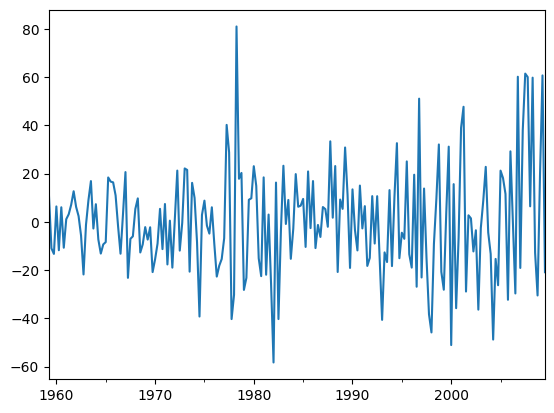

In [171]:
resid.plot()

In [172]:
from PythonTsa.LjungBoxtest import plot_LB_pvalue

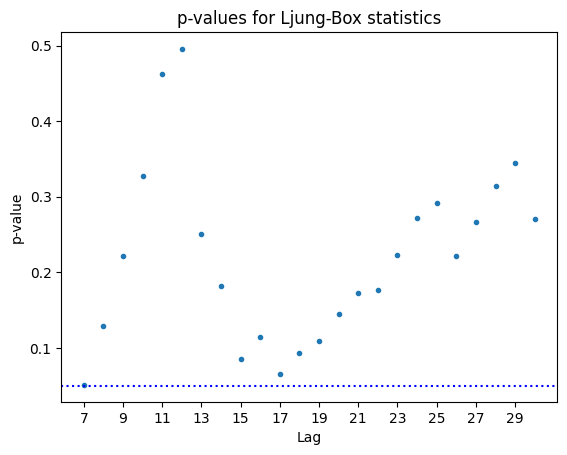

In [173]:
plot_LB_pvalue(resid,noestimatedcoef=6, nolags=30)

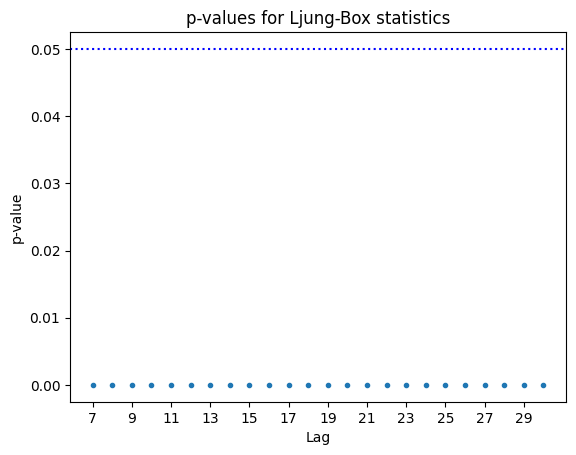

In [176]:
plot_LB_pvalue(resid**2,noestimatedcoef=6, nolags=30)

In [178]:
from arch import arch_model

In [192]:
garchmod = arch_model(resid, p=1, q=1, mean ='zero').fit()
garchmod.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1255.0646784951145
Iteration:      2,   Func. Count:     11,   Neg. LLF: 891.3011763391974
Iteration:      3,   Func. Count:     15,   Neg. LLF: 891.5516856456554
Iteration:      4,   Func. Count:     20,   Neg. LLF: 903.2341775507882
Iteration:      5,   Func. Count:     26,   Neg. LLF: 891.0635098017665
Iteration:      6,   Func. Count:     30,   Neg. LLF: 891.0456848295556
Iteration:      7,   Func. Count:     34,   Neg. LLF: 891.0268801253001
Iteration:      8,   Func. Count:     38,   Neg. LLF: 891.0133555999232
Iteration:      9,   Func. Count:     42,   Neg. LLF: 891.0104295462763
Iteration:     10,   Func. Count:     46,   Neg. LLF: 891.0100833610695
Iteration:     11,   Func. Count:     49,   Neg. LLF: 891.0100832492168
Optimization terminated successfully    (Exit mode 0)
            Current function value: 891.0100833610695
            Iterations: 11
            Function evaluations: 49
            Gradient evaluations: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.005
Vol Model:                      GARCH   Log-Likelihood:               -891.010
Distribution:                  Normal   AIC:                           1788.02
Method:            Maximum Likelihood   BIC:                           1797.94
                                        No. Observations:                  202
Date:                Thu, Aug 08 2024   Df Residuals:                      202
Time:                        20:00:59   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          7.4837      8.580      0.872      0.383   [ -9.332, 24.300]
alpha[1]       0.1191  5.910e-02      2.016  4.381e-02 [3.304e-03,  0.235]
beta[1]        0.8809  6.796e-02     12.962  2.023e-38   [  0.748,  1.014]
==========================================================================

Covariance estimator: robust
"""

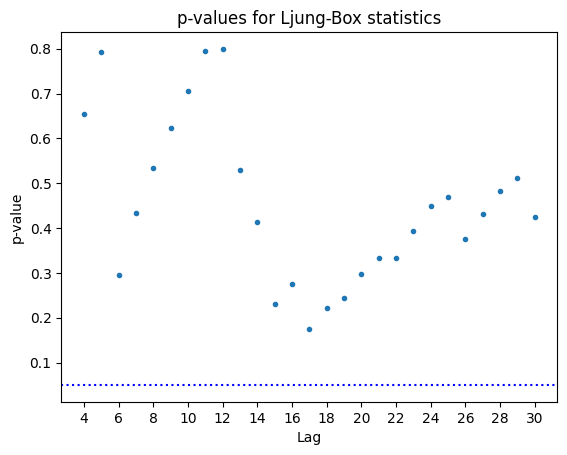

In [199]:
plot_LB_pvalue(garchmod.resid, noestimatedcoef = 3, nolags = 30)

In [201]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig

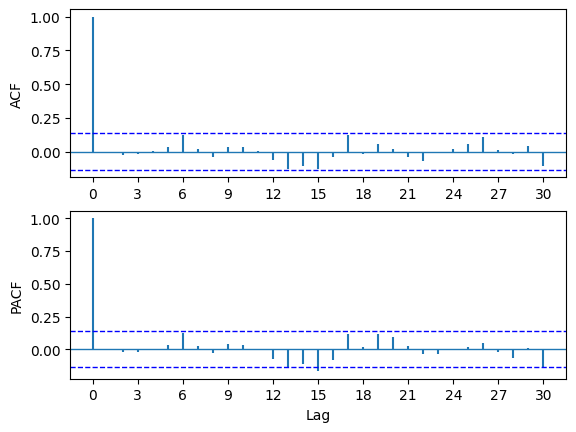

In [203]:
acf_pacf_fig(garchmod.resid, both = True)

# 8.5

<Axes: title={'center': 'log returns of Germany DAX daily index'}, xlabel='Date'>

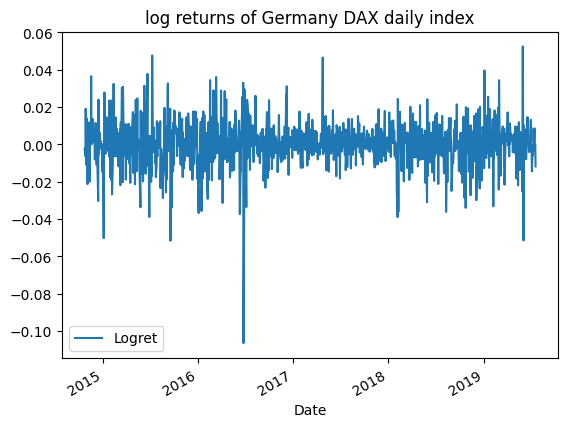

In [205]:
daxlogret = pd.read_csv(dtapath + 'DAXlogret.csv', header = 0)
daxlogret.index = pd.DatetimeIndex(daxlogret.Date)
daxlogret.plot(title = 'log returns of Germany DAX daily index')

In [267]:
logret = pd.DataFrame()
logret = daxlogret.Logret
logret

Date
2014-10-24   -0.002379
2014-10-27   -0.006452
2014-10-28    0.019075
2014-10-29    0.006253
2014-10-30   -0.010968
                ...   
2019-07-15    0.008504
2019-07-16    0.000489
2019-07-17    0.000000
2019-07-18    0.000000
2019-07-19   -0.011844
Name: Logret, Length: 1191, dtype: float64

In [268]:
logret_lag1 = logret.shift(-1)

df = pd.DataFrame({
    'logret': logret,
    'logret_lag1': logret_lag1
})

df = df.dropna()
endog = df['logret'] 
exog = df[['logret_lag1']]
df

,logret,logret_lag1
Date,,
2014-10-24,-0.002379,-0.006452
2014-10-27,-0.006452,0.019075
2014-10-28,0.019075,0.006253
2014-10-29,0.006253,-0.010968
2014-10-30,-0.010968,0.014079
...,...,...
2019-07-12,-0.002843,0.008504
2019-07-15,0.008504,0.000489
2019-07-16,0.000489,0.000000


In [274]:
modsw = sm.tsa.MarkovRegression(df['logret'], k_regimes = 2, 
                                    switching_variance =True,switching_exog=True,
                                    exog=df['logret_lag1']
                                   ).fit()

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [275]:
modsw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                 logret   No. Observations:                 1190
Model:               MarkovRegression   Log Likelihood                3693.010
Date:                Thu, 08 Aug 2024   AIC                          -7370.021
Time:                        20:37:50   BIC                          -7329.367
Sample:                             0   HQIC                         -7354.700
                               - 1190                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      2.579      0.010       0.000       0.001
x1            -0.0062      0.043     -0.145      0.885      -0.090       0.077
sigma2      5.404e-05   5.59e-06      9.673      0.000    4.31e-05     6.5e-05
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -1.375      0.169      -0.003       0.001
x1            -0.1190      0.054     -2.204      0.028      -0.225      -0.013
sigma2         0.0003   3.41e-05      8.767      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9284      0.022     42.219      0.000       0.885       0.972
p[1->0]        0.1350      0.047      2.872      0.004       0.043       0.227
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [276]:
modresid = modsw.resid

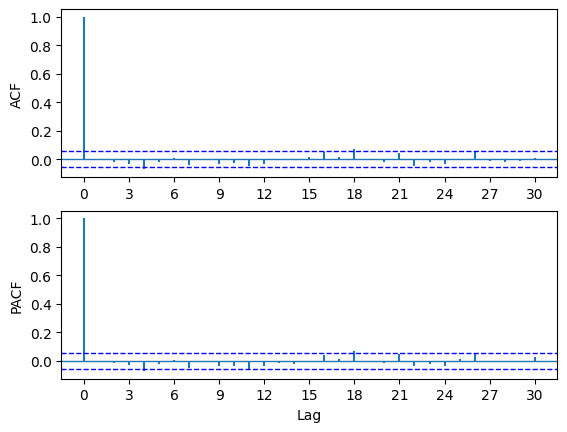

In [277]:
acf_pacf_fig(modresid, both= True)

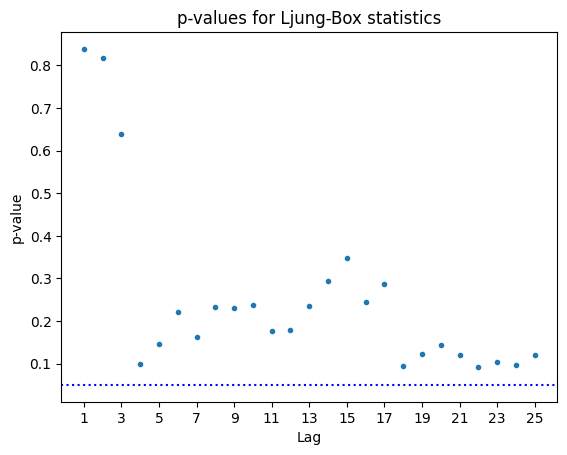

In [278]:
plot_LB_pvalue(modresid, noestimatedcoef=0, nolags = 25)

In [279]:
#comparando com o modelo do exemplo 8.6 deu muito proximo.

# 8.6

In [281]:
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds, ogap, inf

In [283]:
index = pd.date_range('1954-07-01', '2010-10-01', freq = 'QS')

In [285]:
dta_fedfunds = pd.Series(fedfunds, index = index)
dta_ogap = pd.Series(ogap, index=index)
dta_inf = pd.Series(inf, index=index)

<Axes: >

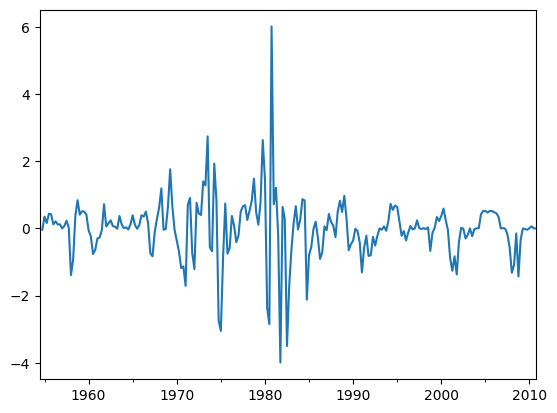

In [376]:
dta_fedfunds.diff().plot()

<Axes: >

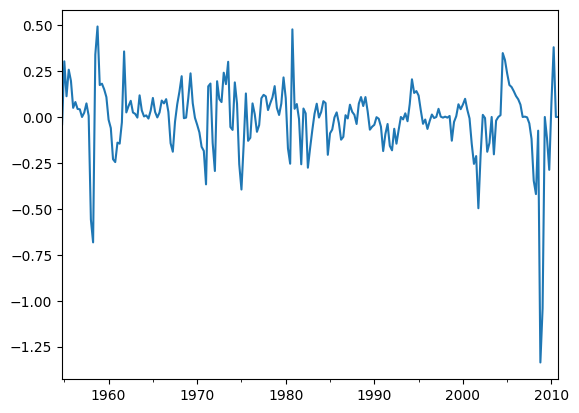

In [401]:
dfed = np.log(dta_fedfunds).diff().dropna()
dfed.plot()

In [412]:
mod_fed = sm.tsa.MarkovAutoregression(dfed, order = 4, k_regimes = 2, 
                                    switching_variance =True,
                                   ).fit()

In [413]:
mod_fed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                        y   No. Observations:                  221
Model:             MarkovAutoregression   Log Likelihood                 164.106
Date:                  Thu, 08 Aug 2024   AIC                           -300.212
Time:                          21:04:17   BIC                           -252.638
Sample:                      10-01-1954   HQIC                          -281.003
                           - 10-01-2010                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0208      0.023     -0.919      0.358      -0.065       0.024
sigma2         0.0798      0.016      5.045      0.000       0.049       0.111
ar.L1          0.6111      0.090      6.773      0.000       0.434       0.788
ar.L2         -0.3808      0.128     -2.976      0.003      -0.632      -0.130
ar.L3          0.5536      0.153      3.624      0.000       0.254       0.853
ar.L4         -0.0051      0.094     -0.054      0.957      -0.189       0.179
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0251      0.013      1.997      0.046       0.000       0.050
sigma2         0.0033      0.001      5.944      0.000       0.002       0.004
ar.L1          0.6897      0.079      8.721      0.000       0.535       0.845
ar.L2         -0.1945      0.070     -2.768      0.006      -0.332      -0.057
ar.L3          0.1360      0.057      2.405      0.016       0.025       0.247
ar.L4         -0.0885      0.046     -1.907      0.056      -0.179       0.002
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7896      0.073     10.850      0.000       0.647       0.932
p[1->0]        0.0896      0.032      2.835      0.005       0.028       0.152
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

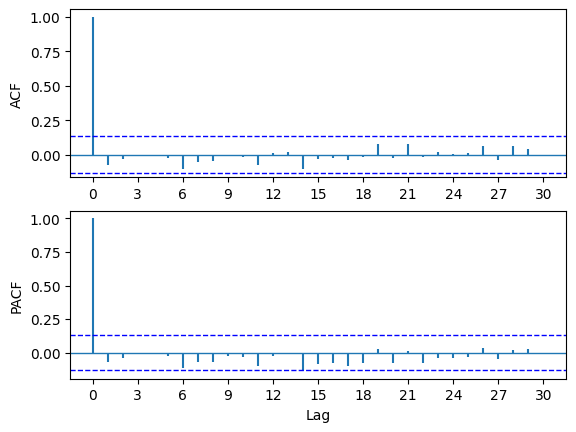

In [414]:
acf_pacf_fig(mod_fed.resid, both= True)

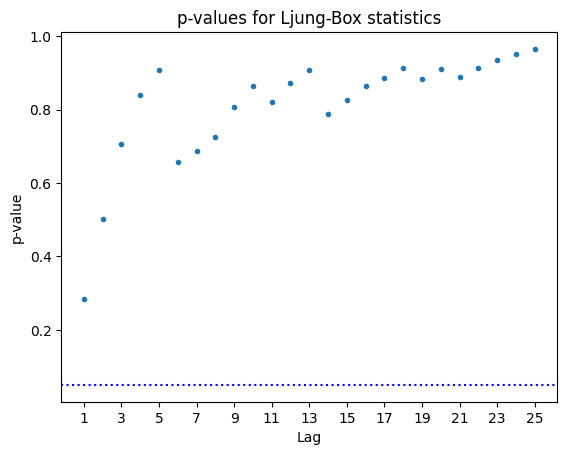

In [415]:
plot_LB_pvalue(mod_fed.resid, noestimatedcoef=0, nolags = 25)

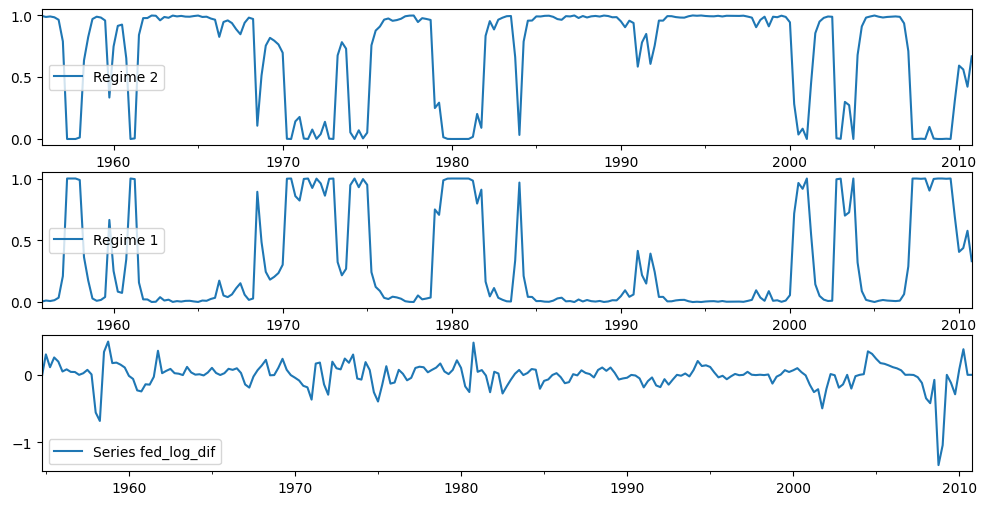

In [416]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(311)
mod_fed.smoothed_marginal_probabilities[1].plot(label = 'Regime 2')
plt.legend()
ax2 = fig.add_subplot(312)
mod_fed.smoothed_marginal_probabilities[0].plot(label = 'Regime 1')
plt.legend()
ax3 = fig.add_subplot(313)
dfed.plot(label = 'Series fed_log_dif')
plt.legend()
plt.show()

# 8.7

In [418]:
dfed

1954-10-01   -0.039609
1955-01-01    0.302720
1955-04-01    0.112795
1955-07-01    0.257223
1955-10-01    0.195974
                ...   
2009-10-01   -0.287682
2010-01-01    0.080043
2010-04-01    0.379490
2010-07-01    0.000000
2010-10-01    0.000000
Freq: QS-JAN, Length: 225, dtype: float64

In [434]:
df_fed = pd.DataFrame({
    'dfed': dfed,               # Série original
    'dfed_lag1': dfed.shift(1), # Lag de 1 período
   # 'dfed_lag2': dfed.shift(2), # Lag de 2 períodos
   # 'dfed_lag3': dfed.shift(3), # Lag de 3 períodos
    #'dfed_lag4': dfed.shift(4),  # Lag de 4 períodos
    'ogap' : dta_ogap,
    'inf' :dta_inf
})

# Remova as linhas com valores NaN (que surgem devido às defasagens)
df_fed = df_fed.dropna()

# Exibir o DataFrame resultante
print(df_fed)

                dfed  dfed_lag1      ogap       inf
1955-07-01  0.257223   0.112795  4.157602 -0.234724
1955-10-01  0.195974   0.257223  4.287756  0.373734
1956-01-01  0.049597   0.195974  3.016838  0.250065
1956-04-01  0.081283   0.049597  2.641856  1.046455
1956-07-01  0.043643   0.081283  1.824735  2.016656
...              ...        ...       ...       ...
2009-10-01 -0.287682  -0.117783 -6.894039  1.487498
2010-01-01  0.080043  -0.287682 -6.830622  2.336871
2010-04-01  0.379490   0.080043 -6.265080  1.785890
2010-07-01  0.000000   0.379490 -5.932871  1.228732
2010-10-01  0.000000   0.000000 -5.593708  1.215500

[222 rows x 4 columns]


In [440]:
mod_ = sm.tsa.MarkovRegression(df_fed['dfed'], exog = df_fed[['dfed_lag1',
                                                              #'dfed_lag2','dfed_lag3','dfed_lag4', 
                                                              'ogap', 'inf']], k_regimes = 2, 
                                    switching_variance =False,
                                   ).fit()

In [441]:
mod_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                   dfed   No. Observations:                  222
Model:               MarkovRegression   Log Likelihood                 101.051
Date:                Thu, 08 Aug 2024   AIC                           -180.102
Time:                        21:16:49   BIC                           -142.673
Sample:                    07-01-1955   HQIC                          -164.991
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0197      0.027      0.727      0.467      -0.033       0.073
x1             0.0484      0.133      0.364      0.716      -0.212       0.309
x2             0.0047      0.006      0.759      0.448      -0.007       0.017
x3             0.0046      0.006      0.734      0.463      -0.008       0.017
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0296      0.036     -0.826      0.409      -0.100       0.041
x1             0.6914      0.088      7.896      0.000       0.520       0.863
x2             0.0283      0.014      1.976      0.048       0.000       0.056
x3            -0.0008      0.006     -0.127      0.899      -0.013       0.011
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0194      0.002      8.839      0.000       0.015       0.024
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.5010      0.338      1.483      0.138      -0.161       1.163
p[1->0]        0.4994      0.218      2.294      0.022       0.073       0.926
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

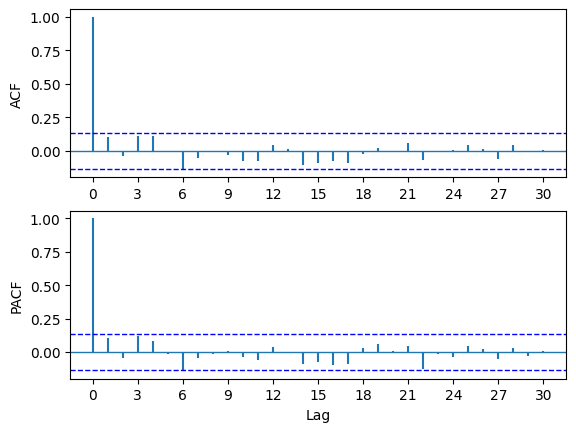

In [442]:
acf_pacf_fig(mod_.resid, both= True)

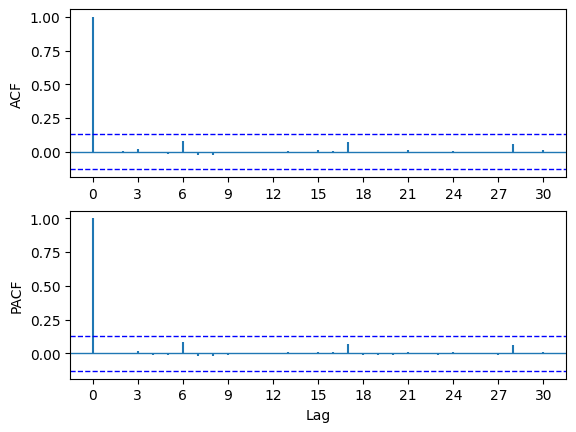

In [444]:
acf_pacf_fig(mod_.resid**2, both= True)

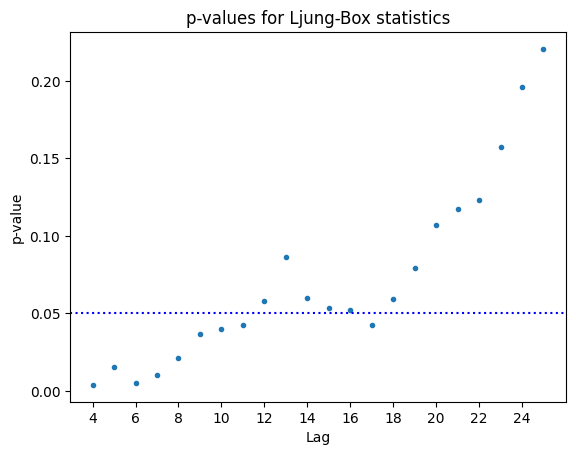

In [446]:
plot_LB_pvalue(mod_.resid, noestimatedcoef=3, nolags = 25)

# 8.3

In [448]:
from statsmodels.tsa.regime_switching.tests.test_markov_regression import areturns

In [451]:
index = pd.date_range("2004-05-04", "2014-05-03", freq = 'W')
dta_areturns = pd.Series(areturns, index=index)

<Axes: >

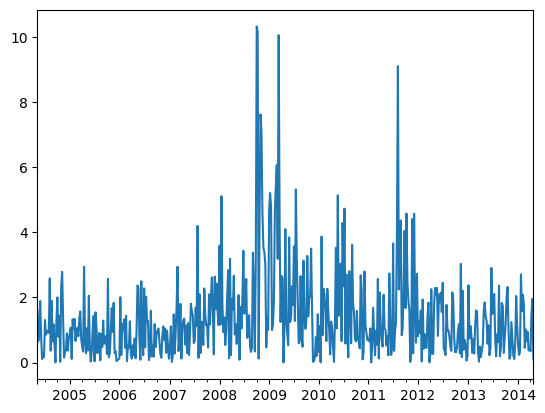

In [452]:
dta_areturns.plot()

In [482]:
mod_aut = sm.tsa.MarkovAutoregression(np.log(dta_areturns), order = 1, k_regimes = 2, switching_variance = True).fit()

In [483]:
mod_aut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                        y   No. Observations:                  520
Model:             MarkovAutoregression   Log Likelihood                -771.884
Date:                  Thu, 08 Aug 2024   AIC                           1559.768
Time:                          21:32:01   BIC                           1593.799
Sample:                      05-09-2004   HQIC                          1573.099
                           - 04-27-2014                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1290      0.070      1.848      0.065      -0.008       0.266
sigma2         0.6262      0.080      7.786      0.000       0.469       0.784
ar.L1          0.2362      0.052      4.505      0.000       0.133       0.339
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7599      0.415     -4.241      0.000      -2.573      -0.947
sigma2         2.2958      0.513      4.474      0.000       1.290       3.302
ar.L1         -0.0531      0.346     -0.153      0.878      -0.731       0.625
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.8430      0.055     15.351      0.000       0.735       0.951
p[1->0]        0.7957      0.114      7.002      0.000       0.573       1.018
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

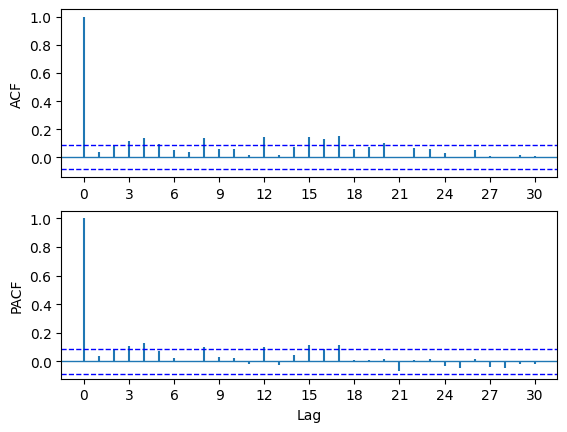

In [484]:
acf_pacf_fig(mod_aut.resid, both= True)

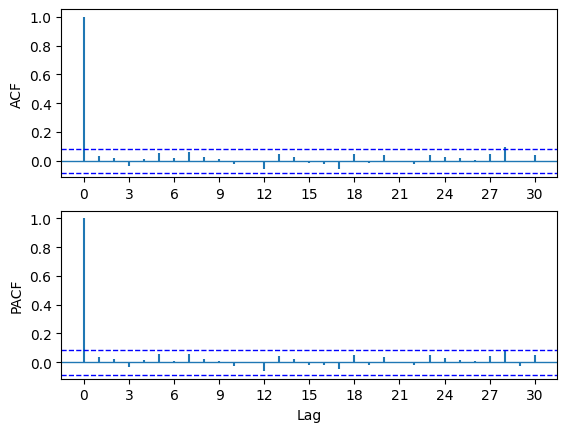

In [485]:
acf_pacf_fig(mod_aut.resid**2, both= True)

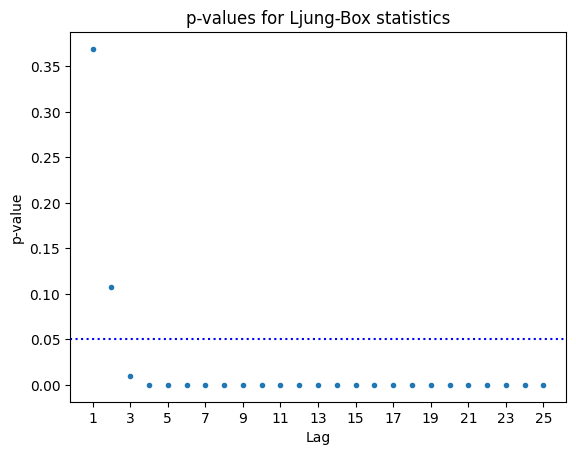

In [486]:
plot_LB_pvalue(mod_aut.resid, noestimatedcoef=0, nolags = 25)